

# Unsupervised/self-supervised learning and generating images in Keras






# **Section 1**

Choose or create a dataset of images (no labels needed), briefly describe it, load it, and show 9 samples
from the dataset in a 3x3 grid. Include a URL or download instructions for the dataset. Very briefly
state a possible application where you might need to generate new samples from this dataset. 

***Dataset***

Crypto punks are a set of 10,000 randomly generated characters, none of which are identical. Crypto punks are seen as a status symbol as well as an investment. This project is being developed on the Ethereum blockchain.It's an NFT project in which the punks are purchased by the buyer. Each punk is given a distinct rating. This dataset was downloaded from Kaggle.This collection contains 10,000 images, each of which is 24 × 24 pixels. We're only using 3000 images due to hardware limitations and GPU limitations. In this case, the model is trained with 2000 images, while the remaining 1000 are used for testing.

***Downloading and creation steps of dataset:***

Step 1: Go to link https://www.kaggle.com/datasets/tunguz/cryptopunks

Step 2: On the right hand cornor there is black box with text Download. Click on download.

Step 3: Onces the dataset is downloaded, extract the images

Step 4: from the extracted images, we have selected only 3000 images dues to GPU limitation and save this images into different folder

Step 5: upload this folder on google drive as we are using golab.

***Application***

The crypto punk's dataset is made up of dozens of attributes, which means there are a variety of designs to choose from: people, zombies, humans, aliens, and so on. We can also utilize an alternate to the list of attributes by considering that no two crypto punks are alike. Using a combination of current crypto punks, we can create new ones. Because each of the crypto punks is unique, the new group will be unique as well. The more unique the combination of distinct crypto punks is, the rarer new crypto punks will be generated.Punks with a blue background are not for sale, those with a red background are available, and those with a purple background are active in the bid. The newly created images may have different backgrounds, which can be used for different notations, such as "already sold out," "not yet sold out," etc.


These crypto punks can be utilized in the animation sector, such as making cartoons, in addition to NFT. Even in this sector, existing images can be repurposed to create new images that play various character roles.

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#------------------------------------------------------------------------------- 
#Loading requried Libraries
#--------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.models import Sequential, Model
import random
from keras.layers import Dense
from keras import Input, Model
import keras
from keras import layers
from tensorflow.keras.losses import mse
from tensorflow.keras import backend as K

Drive_path = "/content/gdrive/MyDrive/crypto_punks"



In [ ]:
#-------------------------------------------------------------------------------
# Load the dataset
#-------------------------------------------------------------------------------

Data = []

def Load_Data():
        for image in os.listdir(Drive_path):
                Image = cv2.imread(os.path.join(Drive_path,image),cv2.IMREAD_GRAYSCALE) 
                Data.append(Image)
Load_Data()

print(len(Data))
print(np.array(Data).shape)



3000
(3000, 24, 24)


In [ ]:
#--------------------------------------------------------------------------------
# Divide into the training and testing data
#-------------------------------------------------------------------------------

Data_length = len(Data)
train_size = int(Data_length/3)

test_from = Data_length - train_size

x_train = Data[:(Data_length - train_size)]
x_test = Data[test_from:]

# normalize the training and testing data
x_train_normalized = []
for i in range(len(x_train)):
    value = x_train[i].astype('float32')/255.0
    x_train_normalized.append(value)
    
x_test_normalized = []
for i in range(len(x_test)):
    value = x_test[i].astype('float32')/255.0
    x_test_normalized.append(value)
  

print("shape of normalized training data:" ,np.array(x_train_normalized).shape)
print("shape of normalized testing data:", np.array(x_test_normalized).shape)


x_train_normalized = np.reshape(x_train_normalized, (len(x_train_normalized), 24, 24, 1))
x_test_normalized = np.reshape(x_test_normalized, (len(x_test_normalized), 24, 24, 1))

x_train_normalized = x_train_normalized.reshape((len(x_train_normalized), np.prod(x_train_normalized.shape[1:])))
x_test_normalized = x_test_normalized.reshape((len(x_test_normalized), np.prod(x_test_normalized.shape[1:])))


shape of normalized training data: (2000, 24, 24)
shape of normalized testing data: (1000, 24, 24)


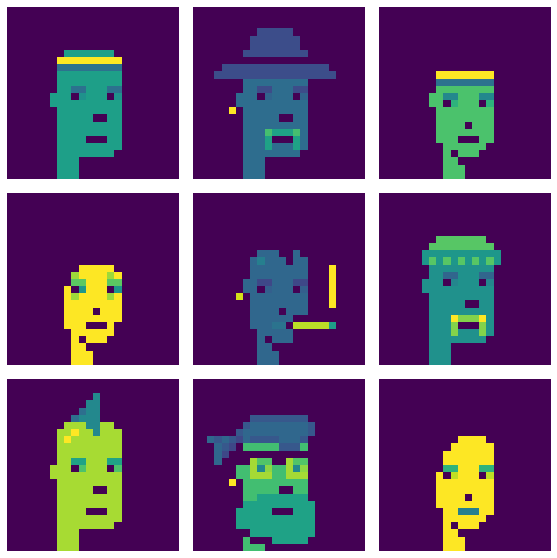

In [ ]:
#-------------------------------------------------------------------------------
# Original train image 
#-------------------------------------------------------------------------------
original = np.reshape(x_train_normalized, (len(x_train_normalized), 24, 24))

from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(3, 3),  # creates 3x3 grid of axes
                 axes_pad=0.2,  
                 )

for ax, im in zip(grid, original[10:19]):
    ax.imshow(im)
    ax.axis("off")

plt.show()


# **Section 2**

Using Keras, build an auto-encoder (AE), a variational auto-encoder (VAE), and a generative adversarial
network (GAN), and train them on the data. 

# ***Auto-Encoder***








An auto encoder is a special type of unsupervised neural network. It is comprised of three components:
1. Encoder: The encoder accepts the input and compresses it into a latent dimension.
2. Bottleneck: It is the lower dimensional hindden layer where encoding is produced.
3. Decoder: Decoder accepts this latent dimension image as input and reconstructs the original input image. 

We created a three-layer dense encoder. There are 128 neurons in the first, 64 neurons in the second, and 32 neurons in the third which acts like an common layer between encoder and decoder.The decoder has a first layer of 64 neurons, a second layer of 128 neurons, and a final layer that is dependent on the size of the input image. The activation function passed is "LeakyReLU", with optimizer = adam and loss = "binary_crossentropy".


**Code Reference** : https://blog.keras.io/building-autoencoders-in-keras.html

**Plot code reference** : https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [ ]:
#-------------------------------------------------------------------------------
#Model creation
#------------------------------------------------------------------------------
import keras
from keras import layers

input_img = keras.Input(shape=(576))
encoded = layers.Dense(128,  activation='LeakyReLU')(input_img)
encoded= layers.Dense(64,  activation='LeakyReLU')(encoded)
encoded = layers.Dense(32, activation='LeakyReLU')(encoded)

decoded  = layers.Dense(64,  activation='LeakyReLU')(encoded)
decoded= layers.Dense(128, activation='LeakyReLU')(decoded)
decoded = Dense(576, activation='sigmoid')(decoded)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 576)]             0         
                                                                 
 dense (Dense)               (None, 128)               73856     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 576)               74304 

In [ ]:
#-------------------------------------------------------------------------------
#fit the model
#-------------------------------------------------------------------------------
auto_Encoder = autoencoder.fit(x_train_normalized, x_train_normalized,
epochs=500,
batch_size=50,
validation_data=(x_test_normalized, x_test_normalized))

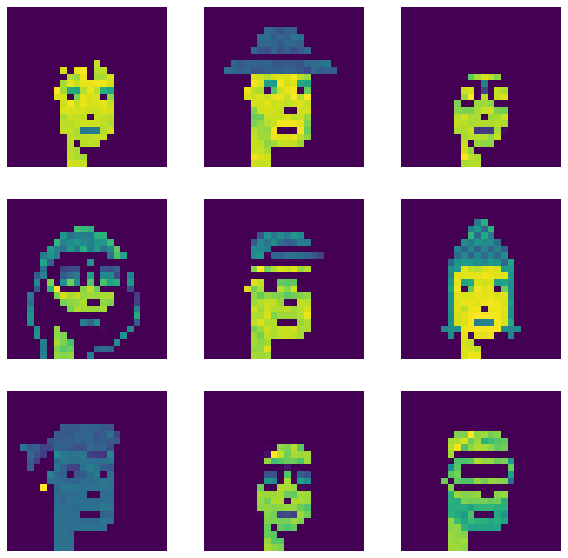

In [ ]:
#-------------------------------------------------------------------------------
#reconstructed images of decoder on test data
#-------------------------------------------------------------------------------

x_test_model_autoencoder = autoencoder.predict(x_test_normalized)
final_autoencoder = np.reshape(x_test_model_autoencoder, (len(x_test_model_autoencoder), 24, 24))

plt.figure(figsize=(10,10)) # specifying the overall grid size

for i in range(9):
    plt.subplot(3,3,i+1)    # the number of images in the grid is 3*3 (9)
    plt.imshow(final_autoencoder[i])
    plt.axis("off")

plt.show()


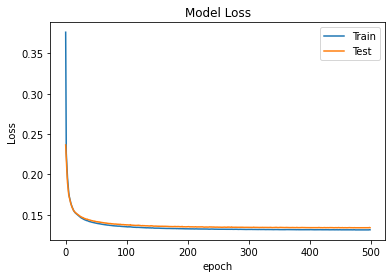

In [ ]:
#-------------------------------------------------------------------------------
#plot of loss training and testing
#-------------------------------------------------------------------------------
plt.plot(auto_Encoder.history['loss'])
plt.plot(auto_Encoder.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

***Result***

The autoencoder model is run for 500 epochs with a batch size of 50. This model took approximately 3 minutes to run. The images made are a bit grainy when compared to the source images, and there is a color variation in the image. We can also see that the training model's loss dramatically reduces from 0.37 to 0.15 before remaining nearly constant. Similarly, in the test model, the loss drops from 0.24 to 0.15 before remaining constant. This reduction occurs at epoch 1, and the value remains nearly constant for the remainder of the epoch.

# ***Varitional Autoencoder***


A variational Auto encoder consist of an encoder, decoder and a loss function. Its goal is to generate a realistic image when given a random vector generated from pre-defined distribution. 

Step 1: The encoder outputs two vectors, z_mean, and z_sigma, from an image (standard).

Step 2: The z_mean and z_sigma vectors are then added and multiplied by a small value epsilon to produce a modified vector of equal size.

Step 3: The decoder then reconstructs the image using this changed vector as input.

The model created is the same as the autoencoder model. The encoder section has two layers (128 and 64) with one 24*24 input, while the decoder part has two layers 64 and 128 with a sample input layer of 32 and a final layer as the input size. "LeakyReLU" was supplied as the activation function, with optimizer = adam, and loss = "binary_crossentropy."

**Code** : Lecture Notes (Week 8)

**Plot code reference** : https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [ ]:
#-------------------------------------------------------------------------------
# initailizing dimensions
#-------------------------------------------------------------------------------

original_dim = 576
intermediate_dim = 128
latent_dim = 32


In [ ]:
#-------------------------------------------------------------------------------
#Sampling
#-------------------------------------------------------------------------------
class Sampling(layers.Layer):
 
    def call(self, inputs):
        # override the inherited .call(self, inputs) method
        z_mean, z_log_var = inputs
        epsilon = tf.keras.backend.random_normal(shape=tf.shape(z_mean)) # N(0, 1)
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon # N(mu, sigma)


In [ ]:
#-------------------------------------------------------------------------------
#Encoder Model
#-------------------------------------------------------------------------------

original_inputs = tf.keras.Input(shape=(original_dim,), name="encoder_input")
x = Dense(intermediate_dim, activation="LeakyReLU")(original_inputs)
x = Dense(64, activation="LeakyReLU")(x)

z_mean = Dense(latent_dim, name="z_mean")(x)
z_log_var = Dense(latent_dim, name="z_log_var")(x)
z = Sampling()((z_mean, z_log_var))
encoder = tf.keras.Model(inputs=original_inputs, outputs=z, name="encoder")

encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 576)]        0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 128)          73856       ['encoder_input[0][0]']          
                                                                                                  
 dense_7 (Dense)                (None, 64)           8256        ['dense_6[0][0]']                
                                                                                                  
 z_mean (Dense)                 (None, 32)           2080        ['dense_7[0][0]']                
                                                                                            

In [ ]:
#-------------------------------------------------------------------------------
# Decoder Model
#-------------------------------------------------------------------------------

latent_inputs = tf.keras.Input(shape=(latent_dim,), name="z_sampling")
x = Dense(64, activation="LeakyReLU")(latent_inputs)
x = Dense(intermediate_dim, activation="LeakyReLU")(x)

outputs = Dense(original_dim, activation="sigmoid")(x)
decoder = tf.keras.Model(inputs=latent_inputs, outputs=outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 32)]              0         
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 576)               74304     
                                                                 
Total params: 84,736
Trainable params: 84,736
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#-------------------------------------------------------------------------------
# Define VAE model.
#-------------------------------------------------------------------------------
outputs = decoder(z)
vae = tf.keras.Model(inputs=original_inputs, outputs=outputs, name="vae")

reconstruction_loss = mse(original_inputs, outputs) 
reconstruction_loss = original_dim * K.mean(reconstruction_loss)
kl_loss = -0.5 * tf.reduce_mean(
    z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)


vae.add_loss(kl_loss)
vae.add_metric(kl_loss, name='kl_loss', aggregation='mean')
vae.add_loss(reconstruction_loss)
vae.add_metric(reconstruction_loss, name='mse_loss', aggregation='mean')

In [ ]:
#-------------------------------------------------------------------------------
#Model call
#-------------------------------------------------------------------------------

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
vae.compile(optimizer)

VAE = vae.fit(x_train_normalized,x_train_normalized, 
              epochs=500, batch_size=40,
              validation_data=(x_test_normalized, x_test_normalized))

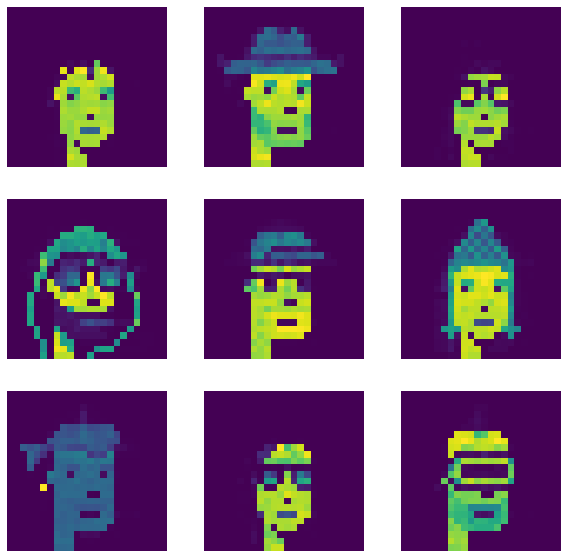

In [ ]:
#-------------------------------------------------------------------------------
#reconstructed images
#-------------------------------------------------------------------------------
x_test_model_vae = vae.predict(x_test_normalized)

final_vae = np.reshape(x_test_model_vae, (len(x_test_model_vae), 24, 24))

plt.figure(figsize=(10,10)) # specifying the overall grid size

for i in range(9):
    plt.subplot(3,3,i+1)    # the number of images in the grid is 3*3 (9)
    plt.imshow(final_vae[i])
    plt.axis("off")

plt.show()




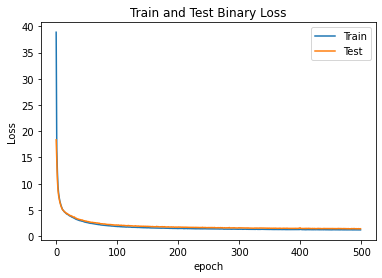

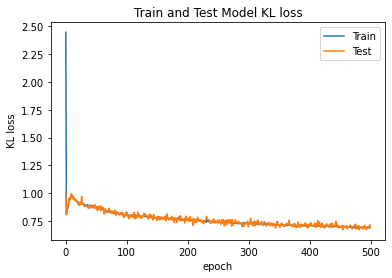

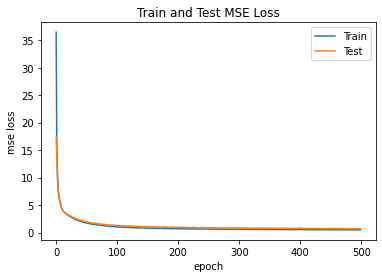

In [ ]:
#-------------------------------------------------------------------------------
#Plot train and test binary loss
#-------------------------------------------------------------------------------
plt.plot(VAE.history['loss'])
plt.plot(VAE.history['val_loss'])
plt.title('Train and Test Binary Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

#-------------------------------------------------------------------------------
#Plot train and test KL loss
#-------------------------------------------------------------------------------
plt.plot(VAE.history['kl_loss'])
plt.plot(VAE.history['val_kl_loss'])
plt.title('Train and Test Model KL loss')
plt.ylabel(' KL loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

#-------------------------------------------------------------------------------
#Plot train and test MSE loss
#-------------------------------------------------------------------------------
plt.plot(VAE.history['mse_loss'])
plt.plot(VAE.history['val_mse_loss'])
plt.title('Train and Test MSE Loss')
plt.ylabel('mse loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

***Result***

The variational model is run for 500 epochs with a learning rate of 1e-3 and a batch size of 50. It took about 4 minutes to complete the task. The images formed are shakier when compared to the originals. The KL and MSE losses, as well as the binary cross-entropy loss, have all been calculated. The KL loss quantifies the difference between the probability distributions. For the test data, the KL loss of VAE ranges between 1 and 0.7, but the training set KL loss at the first epoch drops from 2 to 0.7. After the first epoch, it continues to vary between 1 and 0.7. MSE loss and binary cross-entropy loss have a pattern that is very similar. Both of these losses drop dramatically from 40 to 3 during the first epoch of training data, then remain constant for the rest of the epochs. While testing data, the loss begins at 18 and decreases to 4 after 1 epoch before remaining steady.


# ***Generative Adversarial Networks***

GANs (Generative Adversarial Networks) are a type of unsupervised learning neural network.GAN is utilized to generate new data. GAN is made up of two parts. 
1. Generator : Generator, generates new data instances
2. Discriminator : Discrimator, evaluates the instances generated by generator and decides whether the data belongs to the original training data or not. 

GAN works using a latent step called z_dim. In GAN, we create a new example named x_fake by mapping from the latent space to the generator. The GAN generator performs the same function as the Autoencoder and Varitional Autoencoder decoders. The discriminator is then given this fake image data, which must discriminate between the real data (x_real) from the training set and the created fake data. It provides a classification as a result.

***Code Reference : Lecture Notes***

In [ ]:
from keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import adam_v2 # API change versus older versions
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#-------------------------------------------------------------------------------
#initialize dimensions
#-------------------------------------------------------------------------------
img_shape = (24 * 24)
z_dim = 32

In [ ]:
#-------------------------------------------------------------------------------
# Define generator model (like AE decoder)
# z -> hidden layer -> image
#-------------------------------------------------------------------------------
#G = Sequential()

Gen = Input(shape=(z_dim,),name = "Generator")
layer_1 = Dense(64,activation = "LeakyReLU",name = "layer_1")(Gen)
layer_2 = Dense(128,activation = "LeakyReLU",name = "layer_2")(layer_1)
layer_3 = Dense(np.prod(img_shape),activation = "sigmoid")(layer_2)
layer_var = tf.keras.Model(inputs=Gen, outputs=layer_3, name="encoder")
#G.add(Input(shape=(z_dim,)))
#G.add(Dense(64))
#G.add(LeakyReLU(alpha=0.2))

#G.add(Dense(128))
#G.add(LeakyReLU(alpha=0.2))


#G.add(Dense(np.prod(img_shape), activation="sigmoid"))
layer_var.summary()



Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Generator (InputLayer)      [(None, 32)]              0         
                                                                 
 layer_1 (Dense)             (None, 64)                2112      
                                                                 
 layer_2 (Dense)             (None, 128)               8320      
                                                                 
 dense (Dense)               (None, 576)               74304     
                                                                 
Total params: 84,736
Trainable params: 84,736
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#-------------------------------------------------------------------------------
# Define discriminator model
# image -> hidden layer -> class 0 or 1 (real or fake; note, not digits)
#-------------------------------------------------------------------------------
#D = Sequential()
#D.add(Input(shape=(img_shape)))
#D.add(Dense(128))
#D.add(LeakyReLU(alpha=0.2))
#D.add(Dense(64))

#D.add(Dense(1, activation='sigmoid')) # binary classification
#D.summary()
# Adam with relatively low learning rate and beta_1 (momentum decay)
#D.compile(loss='binary_crossentropy', optimizer=adam_v2.Adam(0.0002, 0.5),
#          metrics=['accuracy'])

Dis = tf.keras.Input(shape=(img_shape), name="Discriminator")
layer_1 = Dense(128, activation="LeakyReLU")(Dis)
layer_2 = Dense(64, activation="LeakyReLU")(layer_1)
output = Dense(1, activation="sigmoid")(layer_2)
Discriminator = tf.keras.Model(inputs=Dis, outputs=output, name="decoder")

Discriminator.summary()

Discriminator.compile(loss='binary_crossentropy', optimizer=adam_v2.Adam(0.0002, 0.5),
          metrics=['accuracy'])

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Discriminator (InputLayer)  [(None, 576)]             0         
                                                                 
 dense_1 (Dense)             (None, 128)               73856     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 82,177
Trainable params: 82,177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#-------------------------------------------------------------------------------
# Set discriminator not trainable, create GAN and optimizer for GAN
# which will train generator only, and compile
#-------------------------------------------------------------------------------
Discriminator.trainable = False
z = Input(shape=(z_dim,))
GAN = Model(z, Discriminator(layer_var(z)))
GAN.compile(loss='binary_crossentropy', optimizer=adam_v2.Adam(0.001, 0.5),
          metrics=['accuracy'])
GAN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 encoder (Functional)        (None, 576)               84736     
                                                                 
 decoder (Functional)        (None, 1)                 82177     
                                                                 
Total params: 166,913
Trainable params: 84,736
Non-trainable params: 82,177
_________________________________________________________________


In [ ]:
#-------------------------------------------------------------------------------
#assigning labels
#-------------------------------------------------------------------------------
batch_size=50
epochs = 1500
steps = epochs * np.array(x_train_normalized).shape[0] // batch_size
sample_interval=100
# fake -> 1, real -> 0
y_fake = np.ones((batch_size, 1))
y_real = np.zeros((batch_size, 1))

In [ ]:
def sample_images(epoch):
    # save an image to see some of our fake images
    r, c = 3, 3
    z = np.random.normal(0, 1, (r * c, z_dim))
    x_fake = layer_var.predict(z)

    #fig, axs = plt.subplots(r, c)
    #for i in range(r):
    #    for j in range(c):
    #        axs[i, j].imshow(x_fake[i*r+j].reshape((24, 24)))
    #        axs[i, j].axis('off')
    #print("saving")
    #plt.tight_layout()
    #plt.savefig("crytoimage.png")
    #plt.show()

In [ ]:
for step in range(steps):

    # choose real images, x_real, and make fake images, x_fake
    idx = np.random.randint(0, np.array(x_train_normalized).shape[0], batch_size)
    x_real = x_train_normalized[idx]
    z = np.random.normal(0, 1, (batch_size, z_dim))
    x_fake = layer_var.predict(z)

    # train D
    loss_d_real = Discriminator.train_on_batch(x_real, y_real)
    loss_d_fake = Discriminator.train_on_batch(x_fake, y_fake)
    loss_d = 0.5 * np.add(loss_d_real, loss_d_fake)

    # train G, by training GAN
    # pass y_real, ie pretend these images are real
    loss_g = GAN.train_on_batch(z, y_real)

    # notice loss_d and loss_g are each really (loss, accuracy),
    # because we requested accuracy as a metric.
    print(f"{step:4d}/{steps} [D {loss_d[0]:.2f}, acc. (on x_real and x_fake) {100 * loss_d[1]:3.0f}] [G {loss_g[0]:.2f}, acc. (on x_fake) {100 * loss_g[1]:3.0f}]")
    if step % sample_interval == 0 or step == steps - 1:
        sample_images(step)

***Result***

GAN model was run at a batch size of 50 with 15000 epochs. The step size calculated is 60000 which took almost 1 hr 50 min to complete its execution. Even after 60000 step size the images generated are not very much clear.

# **Section 3**

***Autoencoder images***

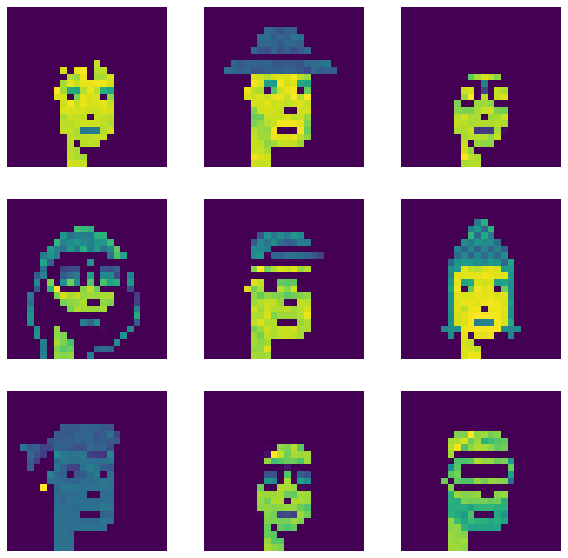

In [ ]:
#-------------------------------------------------------------------------------
#reconstructed images of decoder on test data of auto encoder
#-------------------------------------------------------------------------------

x_test_model_autoencoder = autoencoder.predict(x_test_normalized)
final_autoencoder = np.reshape(x_test_model_autoencoder, (len(x_test_model_autoencoder), 24, 24))

plt.figure(figsize=(10,10)) # specifying the overall grid size

for i in range(9):
    plt.subplot(3,3,i+1)    # the number of images in the grid is 3*3 (9)
    plt.imshow(final_autoencoder[i])
    plt.axis("off")

plt.show()

***Varitional Autoencoder Images***

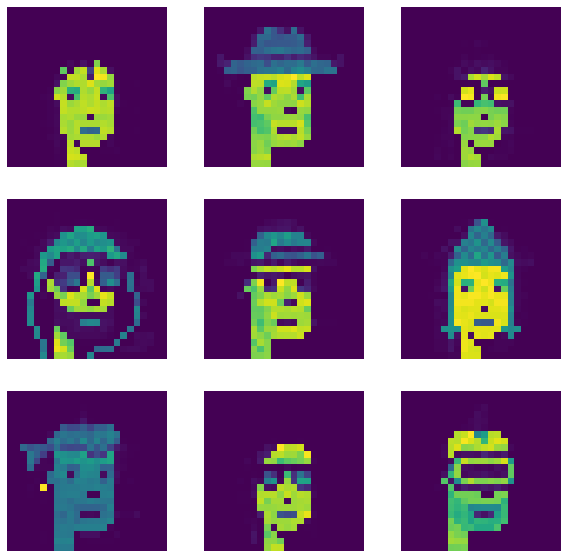

In [ ]:
#-------------------------------------------------------------------------------
#reconstructed images from decoder of VAE
#-------------------------------------------------------------------------------
x_test_model_vae = vae.predict(x_test_normalized)

final_vae = np.reshape(x_test_model_vae, (len(x_test_model_vae), 24, 24))

plt.figure(figsize=(10,10)) # specifying the overall grid size

for i in range(9):
    plt.subplot(3,3,i+1)    # the number of images in the grid is 3*3 (9)
    plt.imshow(final_vae[i])
    plt.axis("off")

plt.show()


***Generative Adversial Network***

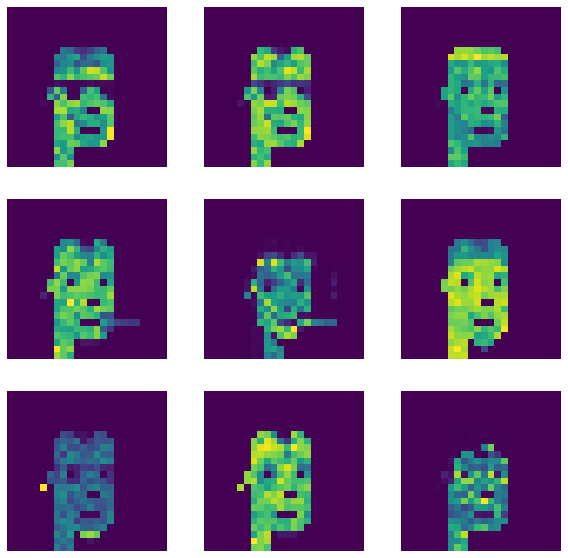

In [ ]:
#-------------------------------------------------------------------------------
#Display Image
#-------------------------------------------------------------------------------

x_test_normalized = np.reshape(x_fake, (len(x_fake), 24, 24))


plt.figure(figsize=(10,10)) # specifying the overall grid size

for i in range(9):
    plt.subplot(3,3,i+1)    # the number of images in the grid is 3*3 (9)
    plt.imshow(x_test_normalized[i])
    plt.axis("off")

plt.show()

***Comparison***

As can be seen, the autoencoder experiences less loss than the variational autoencoder and GAN. In terms of image quality, the autoencoder outperforms the other two methods by a wide margin. However, there is a disadvantage to using an auto-encoder. The autoencoder compresses and reconstructs the input, resulting in an image that is nearly identical to the original. The generative image, on the other hand, is used to create new images from existing ones. Because AE does not add any generative input, it cannot be considered the ideal method for creating images, despite the fact that its images are clearer than the other two. The images created by GAN are little hazy. When compared to VAE images, the images generated by GAN are clearer. But, the time taken for generation of these images by GAN is much more longer then that of VAE.